In [59]:
#!/usr/bin/env/python
import numpy as np
import camb
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt


In [60]:
k_modes = np.loadtxt('outputs/k_modes.txt')

In [88]:
params_linear = np.load('outputs/train_mead2020_feedback_parameter_linear.npz')
params_boost = np.load('outputs/train_mead2020_feedback_parameter_boost.npz')


params_linear = np.load('outputs/test_mead2020_feedback_parameter_linear.npz')
params_boost = np.load('outputs/test_mead2020_feedback_parameter_boost.npz')

In [107]:
i=0
redshifts = np.linspace(0.0, 6.0, 100).tolist()
redshifts.sort(reverse=True)
cp = camb.set_params(ombh2 = params_linear['obh2'][i],
                         omch2 = params_linear['omch2'][i],
                         H0 = 100.*params_linear['h'][i],
                         ns = params_linear['n_s'][i],
                         As = 1e-10*np.exp(params_linear['ln10^{10}A_s'][i]), 
                         omk=0.0, 
                         lmax=5000, 
                         WantTransfer=True,  
                         kmax=100.0,
                         mnu=0.06, standard_neutrino_neff=3.046,
                         halofit_version='mead2020_feedback',
                         tau=0.079,
                         TCMB=2.726, YHe=0.25,
                         HMCode_logT_AGN=params_boost['log_T_AGN'][i],
                         redshifts=redshifts,
                         verbose=False)


results = camb.get_results(cp)
PKcambnl = results.get_matter_power_interpolator(nonlinear=True,
                                                       hubble_units=False,
                                                       k_hunit=False)
PKcambl = results.get_matter_power_interpolator(nonlinear=False,
                                                       hubble_units=False,
                                                       k_hunit=False)


Pnonlin2020 = PKcambnl.P(z=params_linear['z'][i], kh=k_modes)
Plin2020 = PKcambl.P(z=params_linear['z'][i], kh=k_modes)

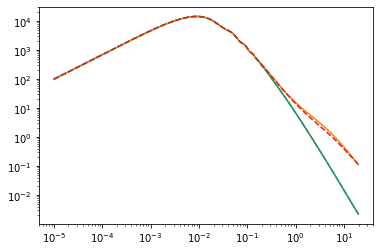

In [108]:
plt.loglog(k_modes,Plin,'-')
plt.loglog(k_modes,Pnonlin,'-')

plt.loglog(k_modes,Plin2020,'--')
plt.loglog(k_modes,Pnonlin2020,'--')

In [112]:
Plin/Plin2020

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [110]:
Pnonlin/Pnonlin2020

array([1.00398191, 1.00363969, 1.00332649, 1.00303985, 1.00277772,
       1.00253789, 1.00231866, 1.00211822, 1.00193499, 1.00176753,
       1.00161451, 1.00147474, 1.00134702, 1.00123035, 1.00112379,
       1.00102656, 1.00093773, 1.0008566 , 1.00078257, 1.00071508,
       1.00065343, 1.00062467, 1.00059721, 1.00057098, 1.00054593,
       1.00052201, 1.00049915, 1.00047732, 1.00045648, 1.00043659,
       1.00041762, 1.00039952, 1.00038222, 1.00036569, 1.00034994,
       1.00033492, 1.0003206 , 1.00030691, 1.00029383, 1.00028138,
       1.00026951, 1.00025817, 1.00024735, 1.00023705, 1.0002272 ,
       1.00021779, 1.00020882, 1.0002003 , 1.00019217, 1.00018438,
       1.0001769 , 1.00016976, 1.00016295, 1.00015642, 1.00015016,
       1.00014418, 1.00013845, 1.00013292, 1.00012755, 1.00012236,
       1.0001174 , 1.0001142 , 1.00011104, 1.00010793, 1.00010486,
       1.00010183, 1.00009882, 1.00009583, 1.00009285, 1.00008988,
       1.00008691, 1.00008391, 1.00008088, 1.00007779, 1.00007

In [103]:
spectra = np.load('outputs/linear_matter_mead2020_feedback.npz')
boost = np.load('outputs/non_linear_boost_mead2020_feedback.npz')

spectra = np.load('outputs/linear_matter_test_mead2020_feedback.npz')
boost = np.load('outputs/non_linear_boost_test_mead2020_feedback.npz')

In [104]:
(params_linear['omch2'][i]+params_linear['obh2'][i])/params_linear['h'][i]**2

0.19438835062573817

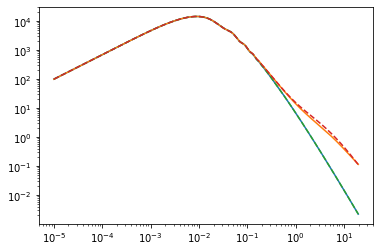

In [105]:
plt.loglog(k_modes,spectra['features'][i])
plt.loglog(k_modes,spectra['features'][i]*boost['features'][i])

plt.loglog(k_modes,Plin,'--')
plt.loglog(k_modes,Pnonlin,'--')

In [106]:
Pnonlin/Plin

array([ 1.00000067,  1.00000074,  1.0000008 ,  1.00000088,  1.00000096,
        1.00000105,  1.00000115,  1.00000125,  1.00000137,  1.00000149,
        1.00000163,  1.00000178,  1.00000194,  1.00000212,  1.00000232,
        1.00000253,  1.00000276,  1.000003  ,  1.00000328,  1.00000357,
        1.00000389,  1.00000406,  1.00000423,  1.00000441,  1.0000046 ,
        1.0000048 ,  1.000005  ,  1.00000521,  1.00000543,  1.00000566,
        1.0000059 ,  1.00000614,  1.00000639,  1.00000665,  1.00000691,
        1.00000719,  1.00000747,  1.00000776,  1.00000806,  1.00000836,
        1.00000867,  1.00000898,  1.0000093 ,  1.00000962,  1.00000995,
        1.00001028,  1.0000106 ,  1.00001092,  1.00001124,  1.00001155,
        1.00001185,  1.00001214,  1.00001241,  1.00001266,  1.00001288,
        1.00001307,  1.00001321,  1.00001331,  1.00001336,  1.00001334,
        1.00001325,  1.00001315,  1.000013  ,  1.00001281,  1.00001256,
        1.00001226,  1.00001191,  1.00001148,  1.00001098,  1.00

In [96]:
boost['features'][i]

array([ 0.99603456,  0.99637425,  0.99668534,  0.99697024,  0.99723093,
        0.99746958,  0.99768784,  0.99788751,  0.99807011,  0.99823708,
        0.99838972,  0.99852921,  0.99865673,  0.99877329,  0.99887978,
        0.99897701,  0.99906591,  0.99914714,  0.99922132,  0.999289  ,
        0.99935088,  0.99937978,  0.99940738,  0.99943375,  0.99945897,
        0.99948306,  0.9995061 ,  0.99952812,  0.99954916,  0.99956926,
        0.99958845,  0.99960677,  0.99962431,  0.99964109,  0.9996571 ,
        0.99967238,  0.99968698,  0.99970095,  0.99971431,  0.99972705,
        0.99973923,  0.99975088,  0.99976201,  0.99977263,  0.99978279,
        0.99979253,  0.99980182,  0.99981067,  0.99981911,  0.99982721,
        0.99983499,  0.99984241,  0.99984949,  0.99985627,  0.99986274,
        0.99986891,  0.99987479,  0.99988041,  0.99988582,  0.99989099,
        0.99989586,  0.99989896,  0.99990197,  0.99990488,  0.99990771,
        0.99991045,  0.99991309,  0.99991566,  0.99991813,  0.99

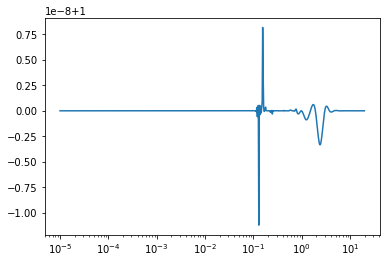

In [66]:

plt.plot(k_modes,train_spectra['Plin']*train_spectra['boost']/Pnonlin)
plt.xscale('log')


In [68]:
from cosmopower import cosmopower_NN

cp_nn_lin = cosmopower_NN(restore=True, restore_filename='outputs/lin_matter_power_emulator_mead2020_feedback')
cp_nn_boost = cosmopower_NN(restore=True, restore_filename='outputs/boost_matter_power_emulator_mead2020_feedback')

params_linear = np.load('outputs/test_mead2020_feedback_parameter_linear.npz')
params_boost = np.load('outputs/test_mead2020_feedback_parameter_boost.npz')


In [69]:

emulated_testing_spectra = cp_nn_lin.ten_to_predictions_np(params_linear)
emulated_testing_boost = cp_nn_boost.predictions_np(params_boost)


/home/pierre/.local/lib/python3.10/site-packages/cosmopower/cosmopower_NN.py:336: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])


In [70]:

testing_spectra = np.load('outputs/linear_matter_test_mead2020_feedback.npz')
testing_boost = np.load('outputs/non_linear_boost_test_mead2020_feedback.npz')

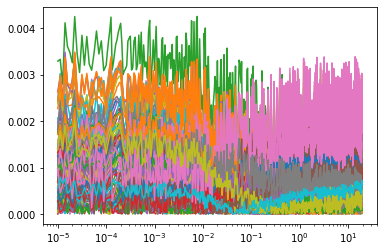

In [71]:
for i in range(100):
    plt.plot(k_modes,np.abs((emulated_testing_spectra[i]-testing_spectra['features'][i])/testing_spectra['features'][i]))
plt.xscale('log')


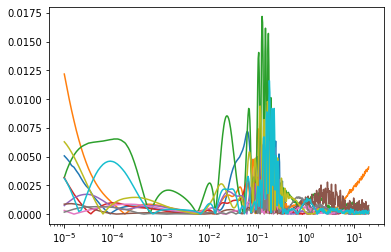

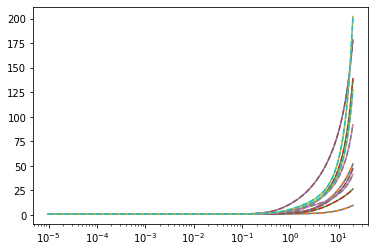

In [76]:
for i in range(10):
    plt.plot(k_modes,np.abs((emulated_testing_boost[i]-testing_boost['features'][i])/testing_boost['features'][i]))
plt.xscale('log')
plt.show()

for i in range(10):
    plt.plot(k_modes,emulated_testing_boost[i])
    plt.plot(k_modes,testing_boost['features'][i],'--')
plt.xscale('log')
plt.show()


In [77]:
testing_boost['features'][i]

array([  0.98877735,   0.9889115 ,   0.98905572,   0.98921049,
         0.98937617,   0.98955296,   0.98974124,   0.98994111,
         0.99015264,   0.99037587,   0.99061052,   0.99085635,
         0.99111285,   0.99137955,   0.99165566,   0.99194027,
         0.99223237,   0.99253087,   0.99283454,   0.99314193,
         0.99345166,   0.99360692,   0.99376228,   0.9939175 ,
         0.99407232,   0.99422666,   0.99438036,   0.99453314,
         0.99468484,   0.99483535,   0.9949845 ,   0.99513209,
         0.995278  ,   0.99542211,   0.99556425,   0.9957043 ,
         0.99584214,   0.99597769,   0.99611085,   0.99624149,
         0.99636953,   0.99649491,   0.99661758,   0.99673744,
         0.99685448,   0.99696867,   0.99707999,   0.99718842,
         0.99729395,   0.99739653,   0.99749616,   0.9975929 ,
         0.99768679,   0.99777775,   0.99786583,   0.99795108,
         0.99803342,   0.99811282,   0.99818936,   0.9982631 ,
         0.99833406,   0.99837986,   0.99842447,   0.99